In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
a = np.array([
        [0,0,0,0],
        [1/3,0,0,0],
        [-1/3,1,0,0],
        [1,-1,1,0],
    ])

b = np.array([1/8 , 3/8, 3/8, 1/8])
c = np.array([0, 1/3, 2/3, 1.0])

def get_next_U(f, h, t, y):
#     print(t)
    k1 = f(t, y)
    k2 = f(t + c[1]*h, y + h * (a[1][0] * k1 ))
    k3 = f(t + c[2]*h, y + h * (a[2][0] * k1 + a[2][1] * k2))
    k4 = f(t + c[3]*h, y + h * (a[3][0] * k1 + a[3][1] * k2 + a[3][2] * k3))
    k = np.array([k1,k2,k3,k4])
    u_next = y + h * np.sum(b * k)
    return u_next

def solve_rk(f,u0, T, n):
    h = T / n
#     print('h = ', h)
#     print('u_0 = ', u0)
    U_cur = np.zeros(n + 1, dtype=np.float32)
    U_cur[0] = u0
    for i in range(n):
        U_cur[i+1] = get_next_U(f, h, h * i, U_cur[i])
    return np.array(U_cur)
    

In [126]:
np.power(2,10) * 2 ^ 10

1024

In [11]:
def iterate_through_step_decreasing_fsol(fsol, f, u0, T, n0, niters):
    N_all = [n0 * 2 ** i for i in range(niters)]
    U_trace = np.array([solve_rk(f,u0,T,n) for n in tqdm(N_all,position=0)])
    error = np.array([np.max(np.abs(
                        U_trace[i] - np.array(
                            [fsol(t,u0) for t in np.arange(0,T + 1e-9,T/N_all[i])]
                        )))
                    for i in range(len(U_trace))])
    return error, N_all

# def iterate_through_step_decreasing(f, u0, T, n0, niters, max_iter=10):
#     N_all = [n0 * 2 ** i for i in range(niters)]
#     U_trace = np.array([solve_rk(f,u0,T,n,max_iter)[-1] for n in N_all])
#     error = np.array([np.max(np.abs(U_trace[-1] - U_trace[i])) for i in range(len(U_trace-1))])
#     return error, N_all

In [12]:
def plot_solution(X, approx, expected=None):
    if not approx is None:
        plt.plot(X,approx,label='approx')
    if not expected is None:
        plt.plot(X,expected, label='expected')
    plt.legend(loc='best')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
def get_error(approx,expected):
    error = np.max(np.abs(approx - expected))
    x_error = np.argmax(np.abs(approx - expected))
    return error,x_error

In [68]:
def func_1(t, y):
    # e^x
    return y

def sol_1(t, y0):
    return np.exp(t)

def func_2(t, y):
    return 1

def sol_2(t, y0):
    return t + y0

def func_3(t, y):
    return -y

def sol_3(t,y0):
    return np.exp(-t)

def very_complex_f(t,y):
    return t - y - 1

def test_f(t,y):
    return -2 * t * y**(-2)

def sol_test(t,y0=1):
    return 1 / (1 + t**2)

def sol_f2(t,y0):
    return np.exp(-t**2)

def test_f2(t,y):
    return -2 * t * y

11


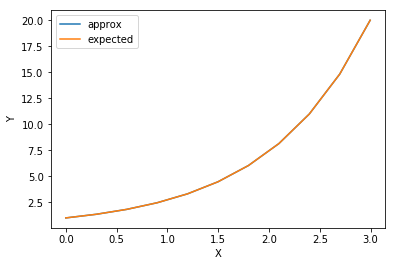

error =  0.00313568115234  at x =  2.99573227355


In [326]:
N = 10
X = np.arange(0,np.log(20) + 1e-9,np.log(20)/N)
print(len(X))
approx = solve_rk(func_1, 1.0, np.log(20), N)
expected = np.array(sol_1(X,1.0))
plot_solution(X, approx, expected)

error, xerr = get_error(approx,expected)
print('error = ', error, ' at x = ', X[xerr])

11


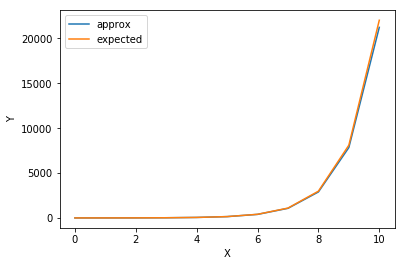

error =  792.989232307  at x =  10.0


In [33]:
N = 10
X = np.arange(0,10 + 1e-9,10/N)
print(len(X))
approx = solve_rk(func_1, 1.0, 10, N)
expected = np.array(sol_1(X,1.0))
plot_solution(X, approx, expected)
error,xerr = get_error(approx,expected)
print('error = ', error, ' at x = ', X[xerr])

11


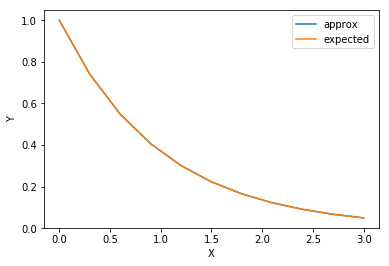

error =  3.17692449965e-05  at x =  0.9


In [25]:
N = 10
T = 3 
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(func_3, 1.0, T, N)
expected = np.array(sol_3(X,0.0))
plot_solution(X, approx, expected)
error,xerr = get_error(approx,expected)
print('error = ', error, ' at x = ', X[xerr])

11


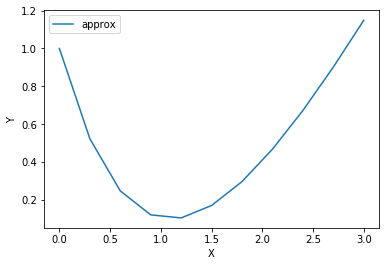

In [24]:
N = 10
T = 3 
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(very_complex_f, 1.0, T, N)
plot_solution(X, approx)

In [53]:
T = 10.0
N0 = 10
u0 = 1.0
error, n_all = iterate_through_step_decreasing_fsol(sol_3,func_3, u0, T, N0, niters=5)

100%|██████████| 5/5 [00:00<00:00, 509.83it/s]


In [91]:
def degree_of_approx(error, h):
    h = np.log(h)
    error = np.log(error)
    return (error[0]-error[1]) / (h[0]-h[1])

[ 10  20  40  80 160]
[ 0.1      0.05     0.025    0.0125   0.00625]


4.648844073534856

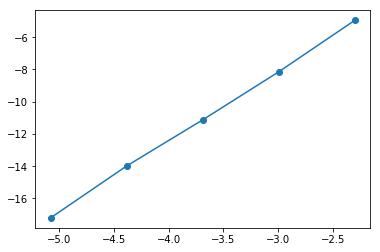

In [54]:
# n_all
n_all = np.array(n_all)
X = np.arange(len(n_all))
print(n_all)
print( 1 /n_all)
plt.plot(np.log(1 / n_all), np.log(error),'-o')

degree_of_approx(error, 1/n_all)

100%|██████████| 5/5 [00:00<00:00, 470.86it/s]

[ 10  20  40  80 160]
[ 0.1      0.05     0.025    0.0125   0.00625]


3.9503219464674126

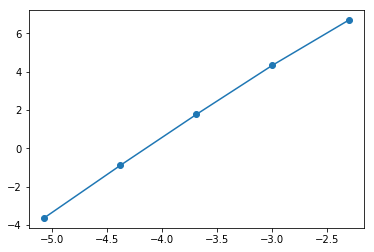

In [52]:
T = 10.0
N0 = 10
u0 = 1.0
error, n_all = iterate_through_step_decreasing_fsol(sol_1,func_1, u0, T, N0, niters=5)

n_all = np.array(n_all)
X = np.arange(len(n_all))
print(n_all)
print(1/n_all)
plt.plot(np.log(1 / n_all), np.log(error),'-o')

degree_of_approx(error, 1/n_all)

100%|██████████| 5/5 [00:00<00:00, 412.03it/s]

[ 10  20  40  80 160]
[ 0.1      0.05     0.025    0.0125   0.00625]


3.9503219464674126

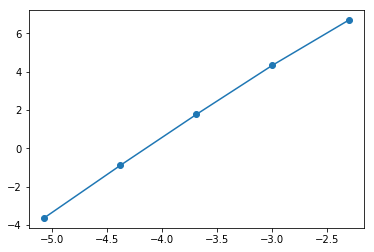

In [72]:
T = 10.0
N0 = 10
u0 = 1.0
error, n_all = iterate_through_step_decreasing_fsol(sol_1,func_1, u0, T, N0, niters=5)

n_all = np.array(n_all)
X = np.arange(len(n_all))
print(n_all)
print(1/n_all)
plt.plot(np.log(1 / n_all), np.log(error),'-o')

degree_of_approx(error, 1/n_all)

1001


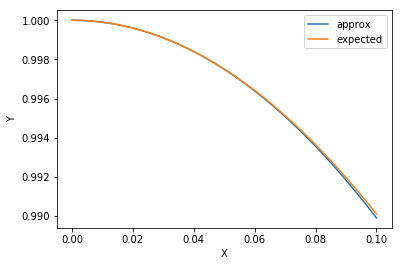

In [51]:
N = int(1e3)
T = 0.1
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(test_f, 1.0, T, N)
expected = np.array(sol_test(X))
plot_solution(X, approx, expected)

101


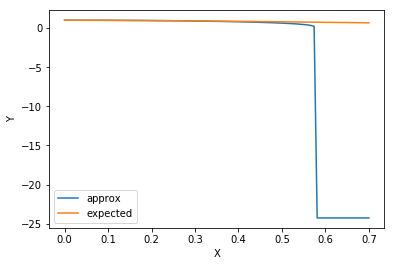

In [65]:
N = int(1e2)
T = 0.7
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(test_f, 1.0, T, N)
expected = np.array(sol_test(X))
plot_solution(X, approx, expected)

100%|██████████| 7/7 [00:00<00:00, 16.42it/s]

[ 100  200  400  800 1600 3200 6400]
[ 0.01        0.005       0.0025      0.00125     0.000625    0.0003125
  0.00015625]


-1.9999015807108294

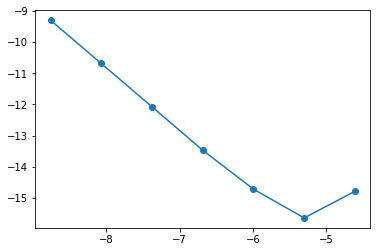

In [67]:
T = 0.01
N0 = int(1e2)
u0 = 1.0
error, n_all = iterate_through_step_decreasing_fsol(sol_test,test_f, u0, T, N0, niters=7)

n_all = np.array(n_all)
X = np.arange(len(n_all))
print(n_all)
print(1/n_all)
plt.plot(np.log(1 / n_all), np.log(error),'-o')

degree_of_approx(error, 1/n_all)

101


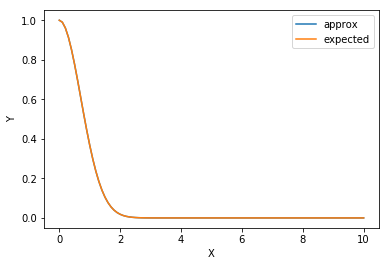

In [74]:
N = int(1e2)
T = 10
X = np.arange(0,T + 1e-9,T/N)
print(len(X))
approx = solve_rk(test_f2, 1.0, T, N)
expected = np.array(sol_f2(X,0))
plot_solution(X, approx, expected)

100%|██████████| 5/5 [00:00<00:00, 228.74it/s]

[ 5 10 20 40 80]
[ 0.2     0.1     0.05    0.025   0.0125]


12.322992175656067

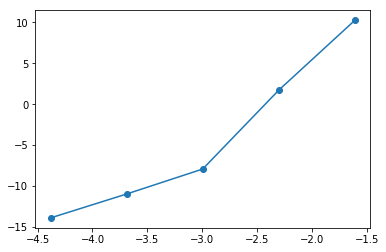

In [103]:
T = 5.0
N0 = 5
u0 = 1.0
error, n_all = iterate_through_step_decreasing_fsol(sol_f2,test_f2, u0, T, N0, niters=5)

n_all = np.array(n_all)
X = np.arange(len(n_all))
print(n_all)
print(1/n_all)
plt.plot(np.log(1 / n_all), np.log(error),'-o')

degree_of_approx(error, 1/n_all)